Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

In [66]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [67]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [86]:
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585


In [69]:
train.sample(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6434,2012-03-05 08:00:00,1,0,1,1,8.20,11.365,59,7.0015,13,415,428
2637,2011-06-17 19:00:00,2,0,1,3,26.24,28.790,83,16.9979,53,275,328
4169,2011-10-05 18:00:00,4,0,1,1,24.60,31.060,53,11.0014,57,536,593
5759,2012-01-15 03:00:00,1,0,0,2,6.56,6.820,48,26.0027,1,24,25
311,2011-01-14 11:00:00,1,0,1,1,7.38,8.335,51,19.0012,6,47,53
9980,2012-11-01 05:00:00,4,0,1,1,13.94,16.665,66,8.9981,1,39,40
232,2011-01-10 23:00:00,1,0,1,1,5.74,7.575,59,11.0014,0,18,18
6477,2012-03-07 03:00:00,1,0,1,1,12.30,13.635,56,23.9994,1,2,3
2228,2011-05-19 18:00:00,2,0,1,1,24.60,31.060,55,11.0014,59,454,513
9067,2012-09-01 04:00:00,3,0,0,1,28.70,32.575,70,0.0000,3,9,12


In [70]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [71]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<Axes: >

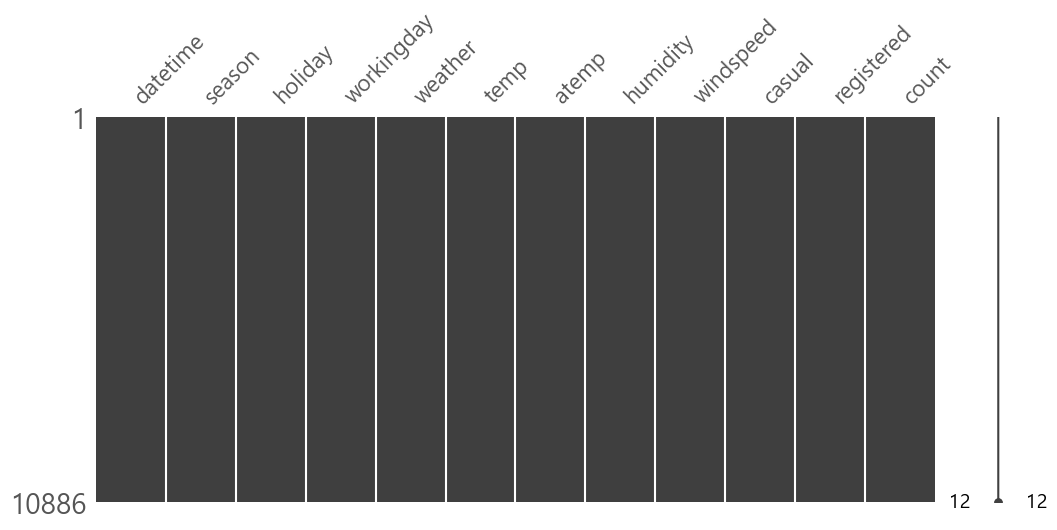

In [72]:
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [73]:
train['year'] = train['datetime'].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [74]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [75]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\2619753668.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='year', y='count', ax=ax1, palette=palette)
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\2619753668.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=train, x='year', y='count', ax=ax1, palette=palette)
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\2619753668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x="month", y="count", ax=ax2, palette=palette)
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\2619753668.py:7: UserWarning: 
The palette list has fewer values (6) tha

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

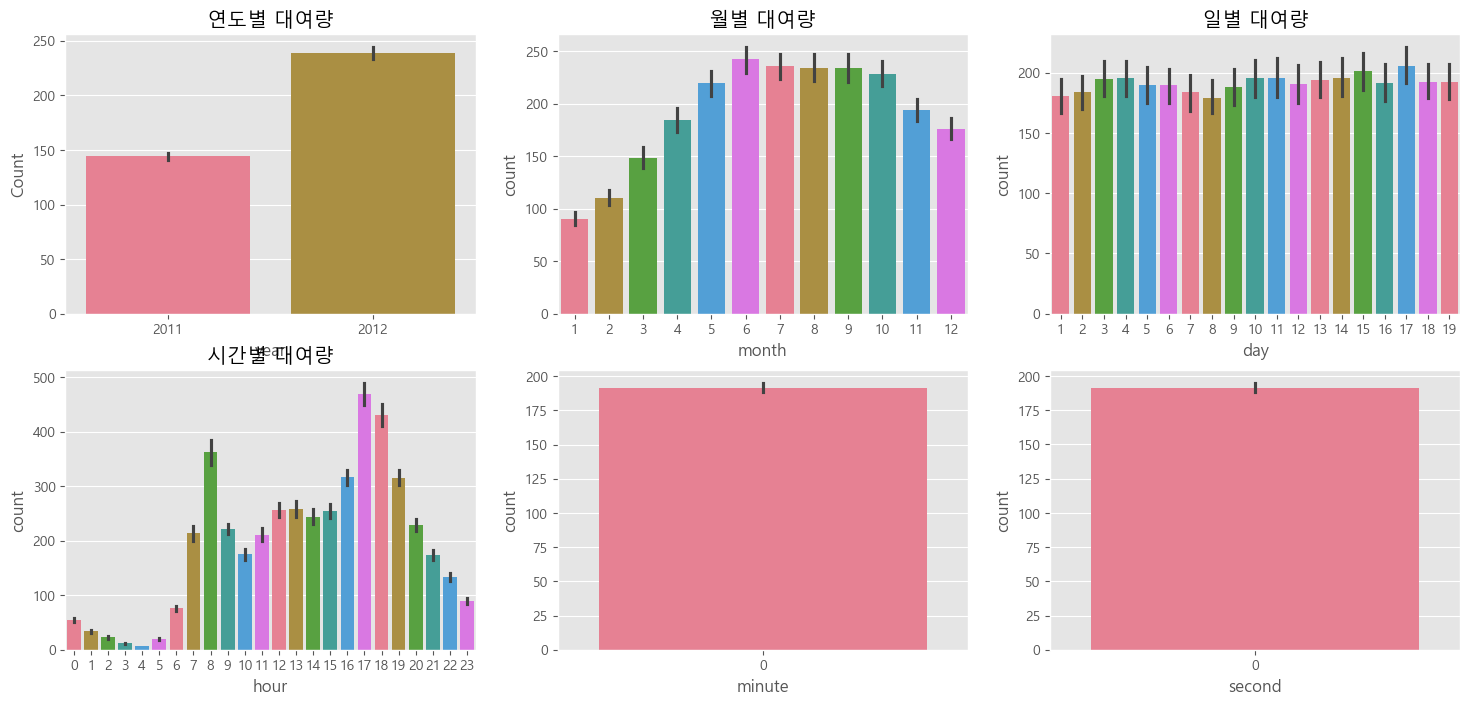

In [76]:
palette = sns.color_palette("husl", n_colors=6)

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='year', y='count', ax=ax1, palette=palette)
sns.barplot(data=train, x="month", y="count", ax=ax2, palette=palette)
sns.barplot(data=train, x="day", y="count", ax=ax3, palette=palette)
sns.barplot(data=train, x="hour", y="count", ax=ax4, palette=palette)
sns.barplot(data=train, x="minute", y="count", ax=ax5, palette=palette)
sns.barplot(data=train, x="second", y="count", ax=ax6, palette=palette)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(xlabel="month", title="월별 대여량")
ax3.set(xlabel="day", title="일별 대여량")
ax4.set(xlabel="hour", title="시간별 대여량")

* 연도별 대여량은 2011년보다 2012년에 더 많다.
* 월별 대여량은 6월에 가자 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안된다.
* 시간별 대여량을 보면 출퇴근 시간에 대여량이 많다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
* 분,초도 다 0이기 때문에 의미가 없다.

C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\3197169940.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y='count', orient='v', ax=axes[0,0], palette=paleete)
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\3197169940.py:5: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.boxplot(data=train, y='count', orient='v', ax=axes[0,0], palette=paleete)
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\3197169940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\chobu\AppData\Local\Temp\ipykernel_14548\3197169940.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  s

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

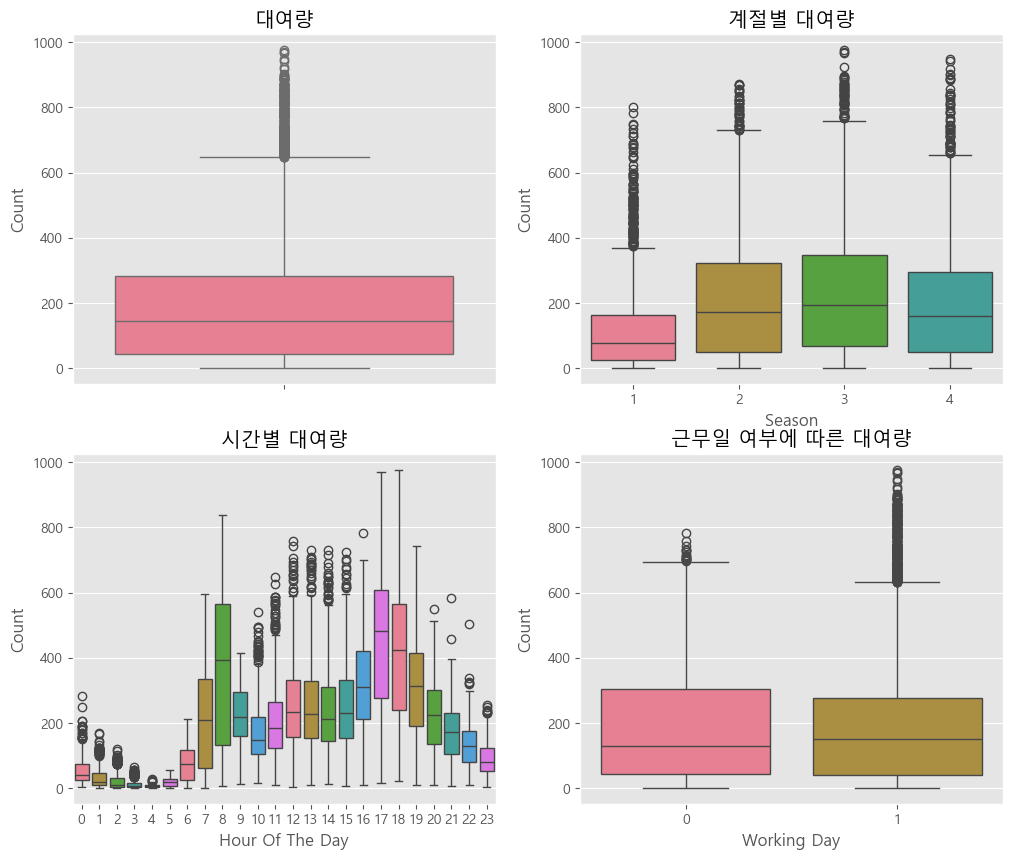

In [77]:
paleete = sns.color_palette("husl", n_colors=6)

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count', orient='v', ax=axes[0,0], palette=paleete)
sns.boxplot(
    data=train, y="count", x="season", orient="v", ax=axes[0, 1], palette=paleete
)
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[1, 0], palette=paleete)
sns.boxplot(
    data=train, y="count", x="workingday", orient="v", ax=axes[1, 1], palette=paleete
)

axes[0][0].set(ylabel="Count", title="대여량")
axes[0][1].set(xlabel="Season", ylabel="Count", title="계절별 대여량")
axes[1][0].set(xlabel="Hour Of The Day", ylabel="Count", title="시간별 대여량")
axes[1][1].set(xlabel="Working Day", ylabel="Count", title="근무일 여부에 따른 대여량")

* 가을에 대여량이 제일 많고, 봄이 제일 적다.
* 근무일보다는 휴일에 대여량이 조금 더 많다.

In [78]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [79]:
train['dayofweek'].value_counts().sort_index()

dayofweek
0    1551
1    1539
2    1551
3    1553
4    1529
5    1584
6    1579
Name: count, dtype: int64

<Axes: xlabel='hour', ylabel='count'>

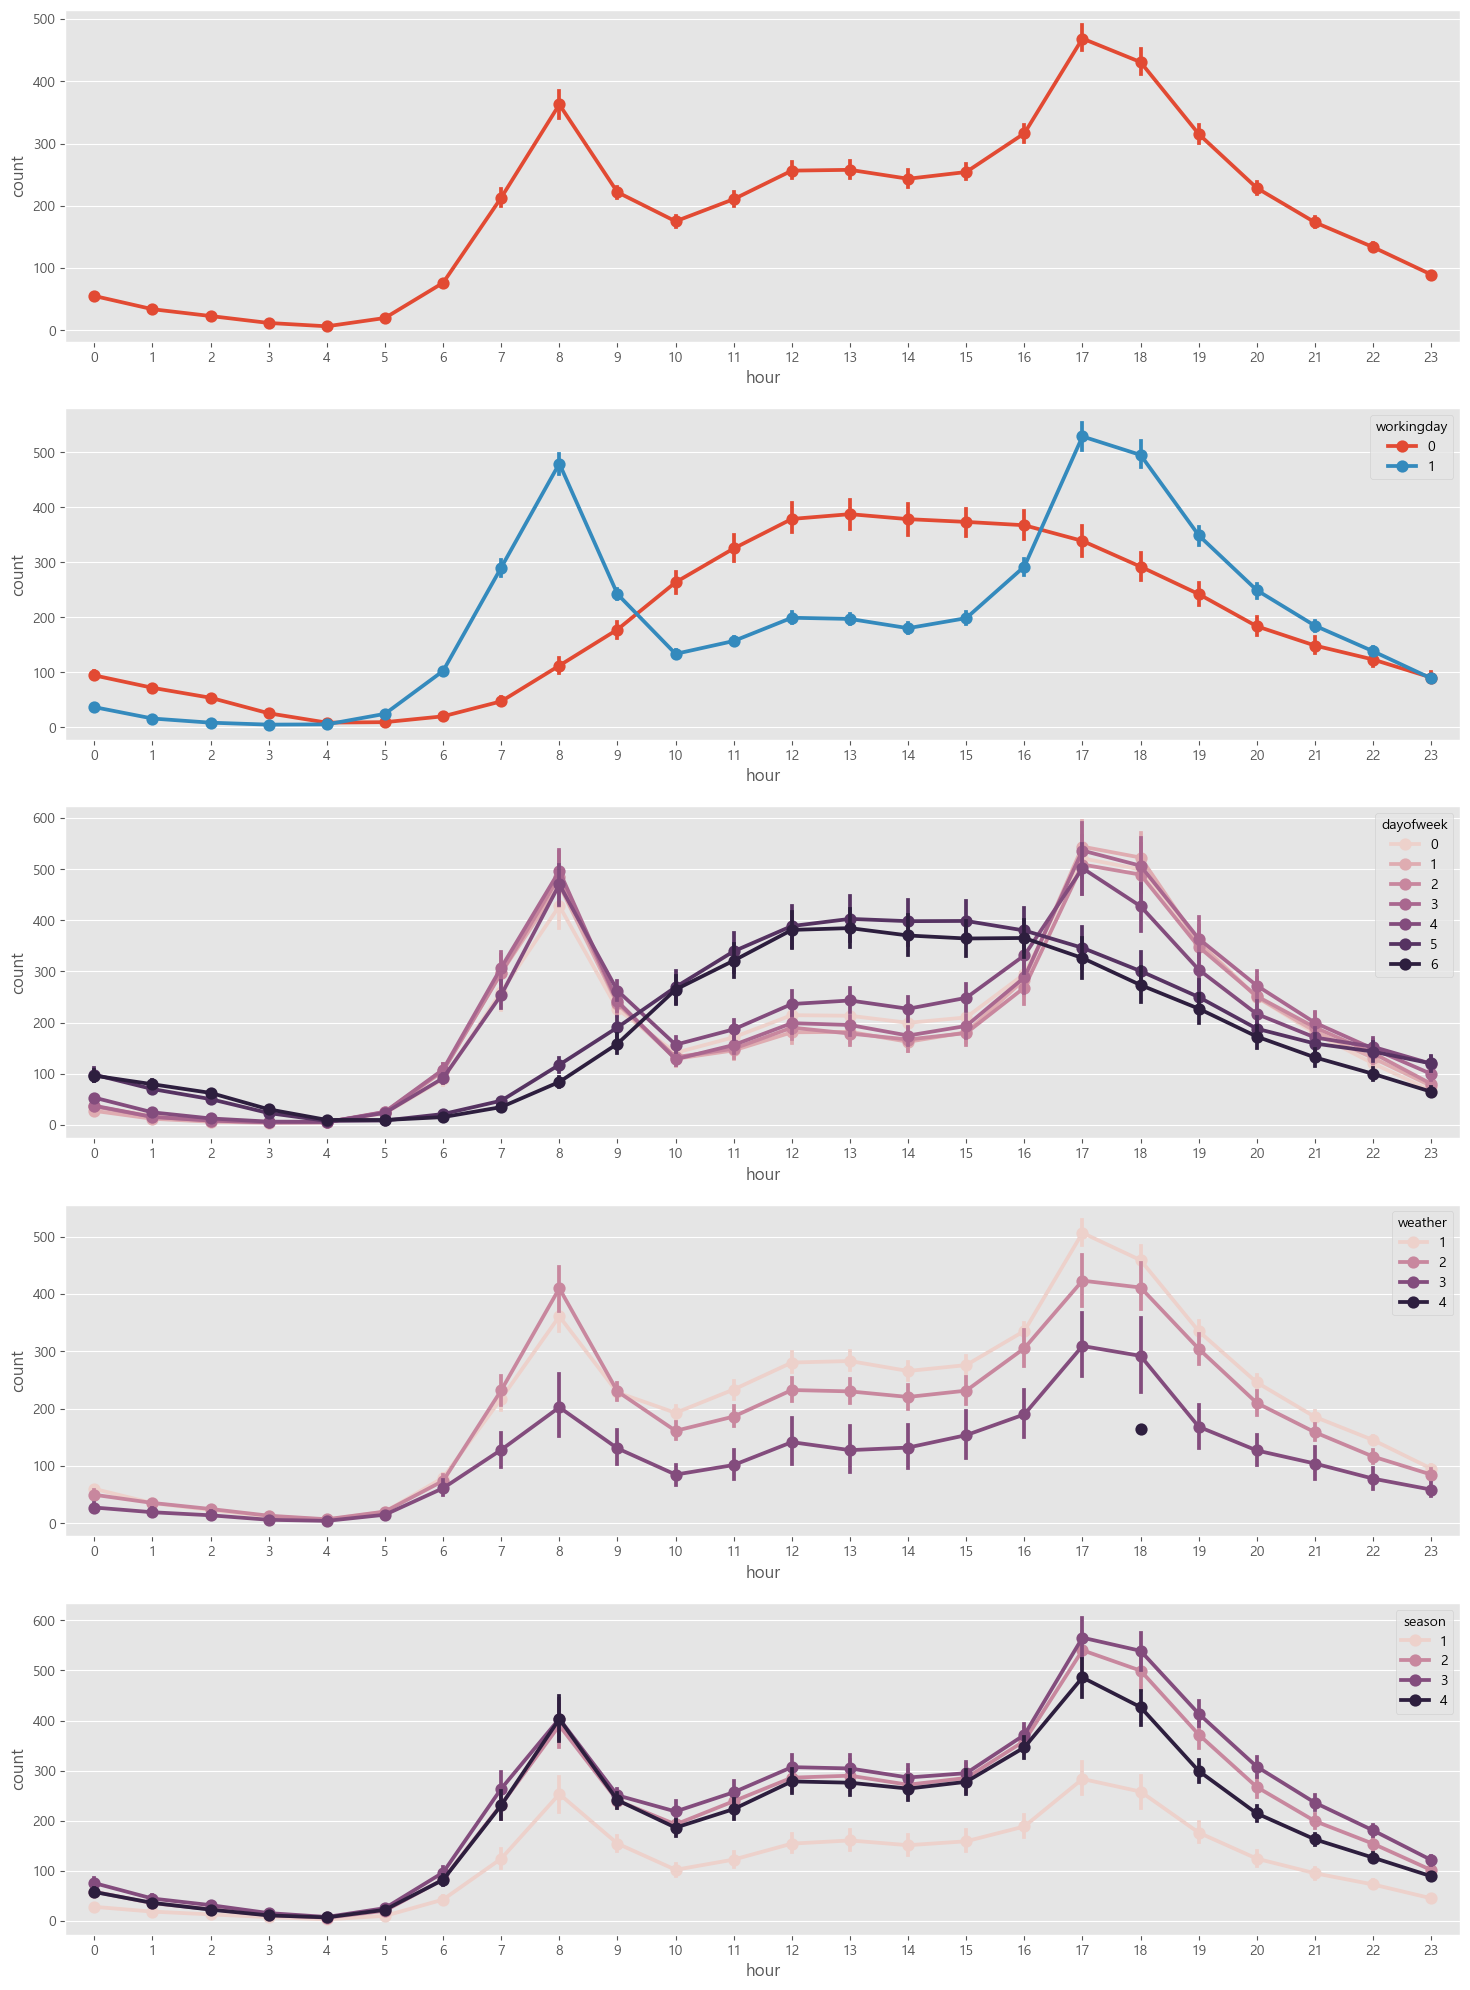

In [80]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

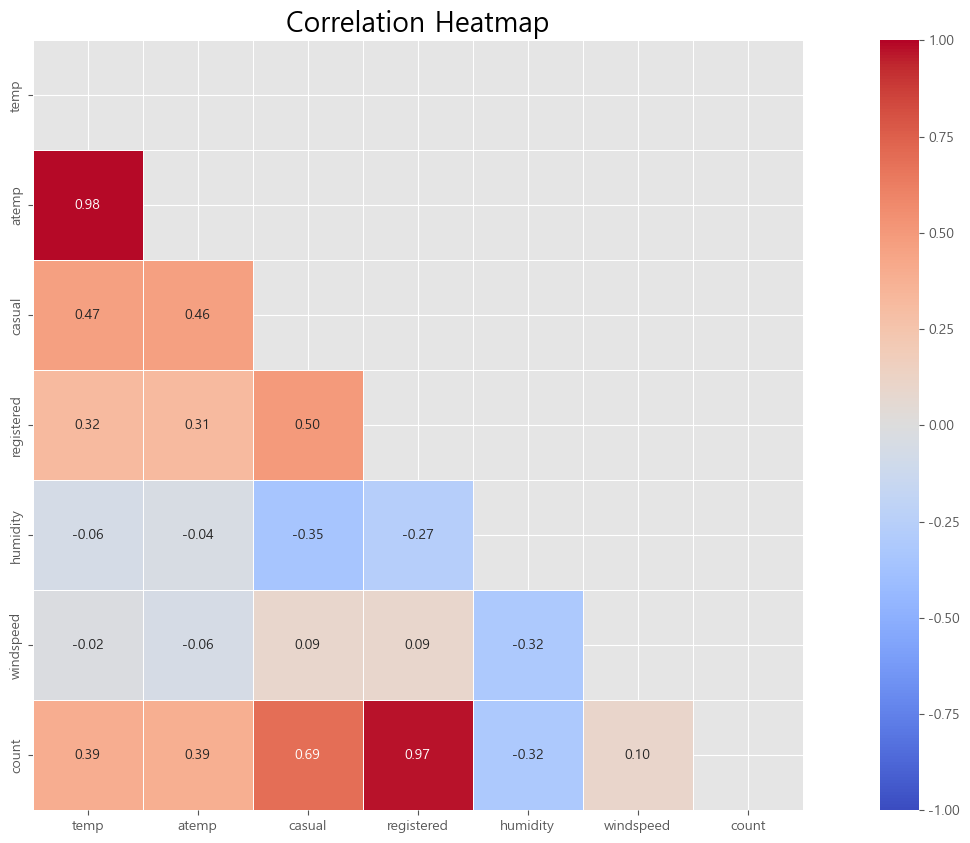

In [82]:
# 데이터 준비
corrMatt = train[
    ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]
].corr()

# 마스크 생성
mask = np.triu(np.ones_like(corrMatt, dtype=bool))  # 상삼각형 마스크 생성

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(
    corrMatt,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmax=1,  # 최대값 설정
    vmin=-1,  # 최소값 설정
    square=True,
    linewidths=0.5,  # 구분선 추가
)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

* 온도, 습도, 풍속은 연관관계가 없다.
* 대여량과 가장 연관이 높은건 registered로 등록된 대여자가 많지만, test데이터에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계가 아주 높지만, 온도와 체감온도를 피처로 사용하기에는 적합하지 않을 수 있다.

<Axes: xlabel='windspeed', ylabel='count'>

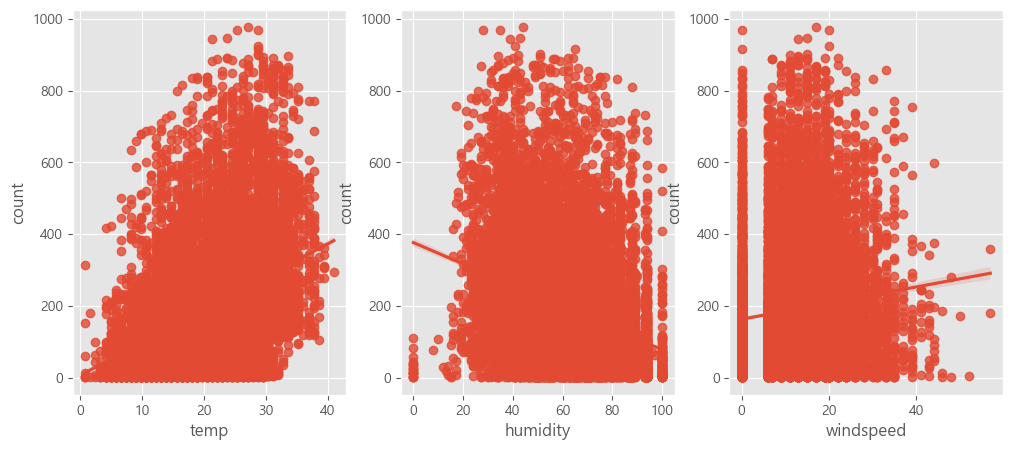

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(data=train, x="temp", y="count", ax=ax1)
sns.regplot(data=train, x="humidity", y="count", ax=ax2)
sns.regplot(data=train, x="windspeed", y="count", ax=ax3)

* 풍속의 경우 0에 숫자가 몰려있는것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해본다.

In [84]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<Axes: xlabel='year_month', ylabel='count'>

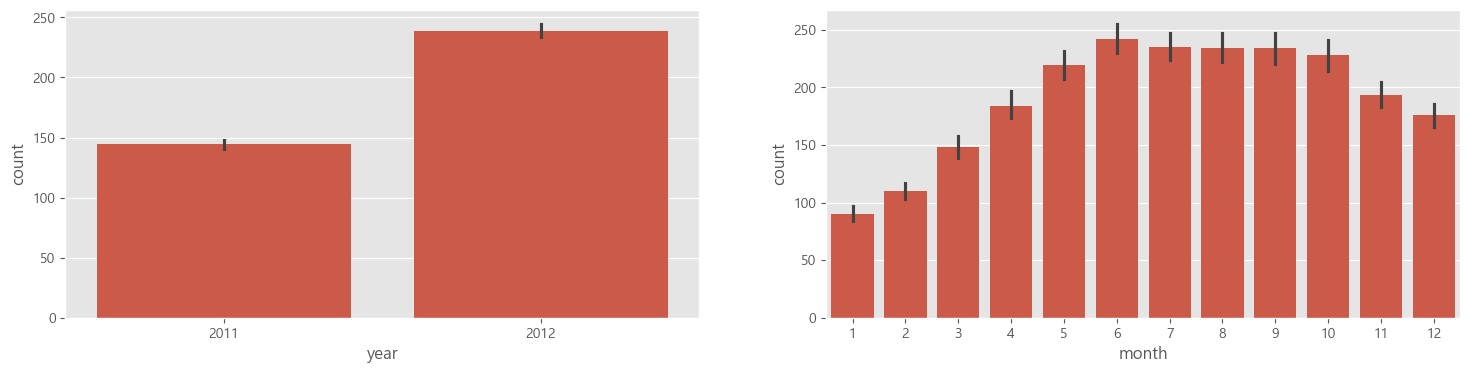

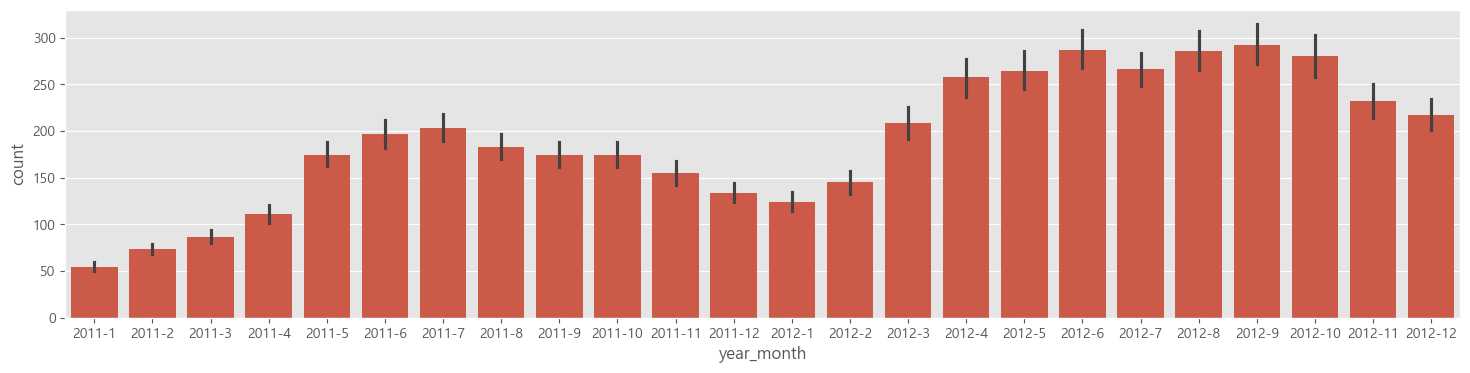

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

* 2011년보다 2012년의 대여량이 더 많다.
* 겨울보다는 여름에 대여량이 더 많다.
* 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [87]:
trainWithoutOutliers = train[
    np.abs(train["count"] - train["count"].mean()) <= (3 * train["count"].std())
]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677], shape=(10739,)),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ], shape=(10739,))),
 (np.float64(1.3486990121229772),
  np.float64(4.562423868087808),
  np.float64(0.958117678090961)))

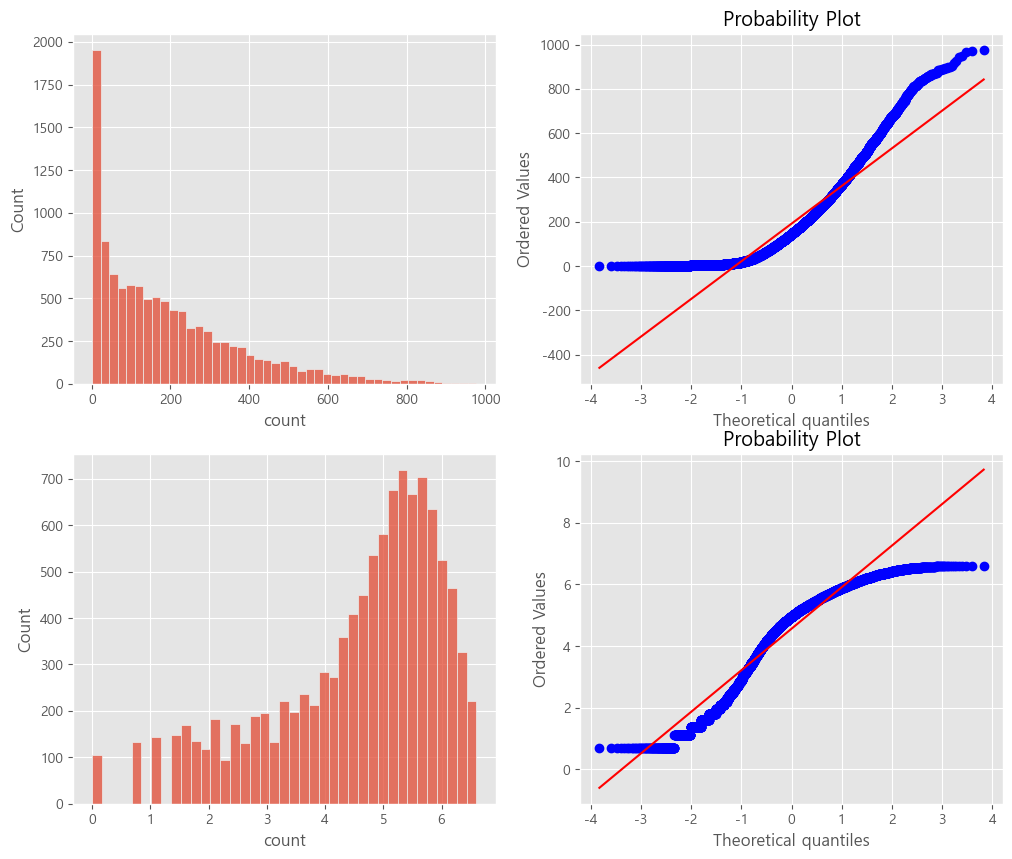

In [97]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 10)

sns.histplot(train["count"], ax=axes[0, 0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0, 1])
sns.histplot(np.log(trainWithoutOutliers['count']), ax=axes[1, 0])
stats.probplot(
    np.log1p(trainWithoutOutliers["count"]), dist="norm", fit=True, plot=axes[1, 1]
)

count변수가 오른쪽에 치우쳐져있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는것이 바람직하다. 대안으로 outlier data를 제거하고 'cout'변수에 로그를 씌워 변경해봐도 정규분포를 따르지는 않지만, 이전 그래프보다는 좀 더 자세히 표현하고 있다.